# Flow Rate Data

Graph of flow rate data from San Diego River at Fashion Valley (USGS 11023000)

In [1]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt

Get JSON file of the water data from USGS website

Documentation for formatting for json retrieval from USGS can be found at

<https://help.waterdata.usgs.gov/faq/automated-retrievals>

In [2]:
r = req.get('http://waterservices.usgs.gov/nwis/iv/?sites=11023000&period=P365D&parameterCd=00060&format=json')
json_data = r.json()

In [3]:
parsed_data = []
for i in json_data['value']['timeSeries']:
    for j in i['values']:
        for k in j['value']:
            parsed_data.append(k)

cfs_df = pd.DataFrame(parsed_data)

In [4]:
# Convert strings into operable types
for idx, row in cfs_df.iterrows():
    
    # Remove ':' from timezone formatting
    # USGS JSON formatting: 2017-06-17T21:45:00.000-07:00
    # Expected formatting:  2017-06-17T21:45:00.000-0700
    datetime_stripped_str = row.dateTime[:-3] + row.dateTime[-2:]
    
    cfs_df.iloc[idx].dateTime = pd.to_datetime(datetime_stripped_str)
    cfs_df.iloc[idx].value = float(row.value)

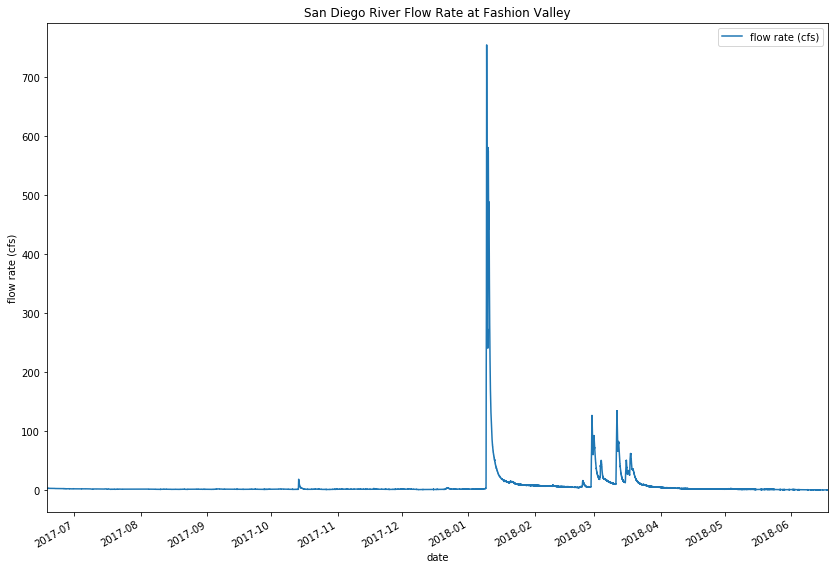

In [17]:
ax = cfs_df.plot(x='dateTime',
                 y='value',
                 figsize = (14, 10),
                 title = 'San Diego River Flow Rate at Fashion Valley')
ax.set_xlabel("date")
ax.set_ylabel("flow rate (cfs)")
ax.legend(["flow rate (cfs)"])
plt.show()